# Predicting Uber NYC Pickup Demands using different models and ANN Architectures

## Objective:

In this project, I attempted to visualize, explore and experiment various different models and ANN techniques that would effectively as well as efficiently predict the Uber NYC Pickups Demand. This is an extension of the other project that we did on Bike-sharing Demand.

This is a unique problem with huge amount of datasets but only 2 considerable classes.

## Steps Involved :

1. Data Preprocessing
2. Visualizations
3. Splitting of Dataset
4. Training and Testing on various models
    - Time Series Forecasting (Sarima, Arima, Holt Winter, Holt Linear)
    - Exponential Smoothing
    - AR Model
5. Results

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))
from sklearn.metrics import mean_squared_error
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

### Import and Preprocess Dataset

In [ ]:
uber_raw_apr14 = pd.read_csv("/content/uber-raw-data-apr14.csv")
uber_raw_may14 = pd.read_csv("/content/uber-raw-data-may14.csv")
uber_raw_jun14 = pd.read_csv("/content/uber-raw-data-jun14.csv")
uber_raw_jul14 = pd.read_csv("/content/uber-raw-data-jul14.csv")
uber_raw_aug14 = pd.read_csv("/content/uber-raw-data-aug14.csv")
uber_raw_sep14 = pd.read_csv("/content/uber-raw-data-sep14.csv")


#Combining dataset of 6 months into 1 dataset
uber_2014 = [uber_raw_apr14, uber_raw_may14, uber_raw_jun14, uber_raw_jul14,uber_raw_aug14, uber_raw_sep14]
uber_data_2014 = pd.concat(uber_2014,axis=0,ignore_index=True)
uber_data_2014.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
uber_data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


#### Dividing the above Date/Time columns into several columns for visualising and analysing the dataset

In [ ]:
import pandas as pd

uber_data_2014.Timestamp = pd.to_datetime(uber_data_2014['Date/Time'],format='%m/%d/%Y %H:%M:%S')
uber_data_2014['Date_only'] = uber_data_2014.Timestamp.dt.date
uber_data_2014['Date'] = uber_data_2014.Timestamp
uber_data_2014['Month'] = uber_data_2014.Timestamp.dt.month
uber_data_2014['DayOfWeekNum'] = uber_data_2014.Timestamp.dt.dayofweek
# Use .dt.day_name() instead of .dt.weekday_name for older pandas versions
uber_data_2014['DayOfWeek'] = uber_data_2014.Timestamp.dt.day_name()
uber_data_2014['MonthDayNum'] = uber_data_2014.Timestamp.dt.day
uber_data_2014['HourOfDay'] = uber_data_2014.Timestamp.dt.hour

uber_data_2014= uber_data_2014.drop(columns = ['Lat','Lon'])
uber_data_2014.tail()

<ipython-input-4-f1b4d72b1461>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uber_data_2014.Timestamp = pd.to_datetime(uber_data_2014['Date/Time'],format='%m/%d/%Y %H:%M:%S')


,Date/Time,Base,Date_only,Date,Month,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
4534322,9/30/2014 22:57:00,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
4534323,9/30/2014 22:57:00,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
4534324,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
4534325,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
4534326,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22


### Visualizations

#### Analysisng Peak Hour

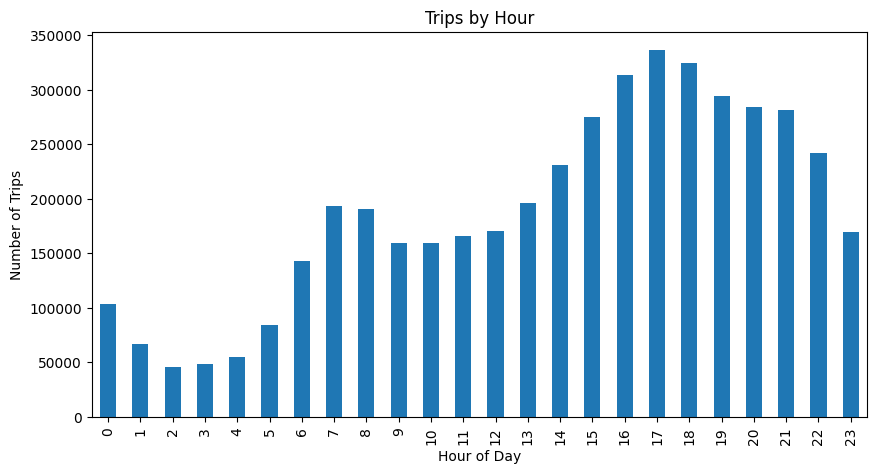

In [ ]:
import matplotlib.pyplot as plt
trips_by_hour = uber_data_2014.groupby('HourOfDay')['HourOfDay'].count()
trips_by_hour.plot(kind='bar', figsize=(10,5))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour')
plt.show()


#### Month having highest Number of trips

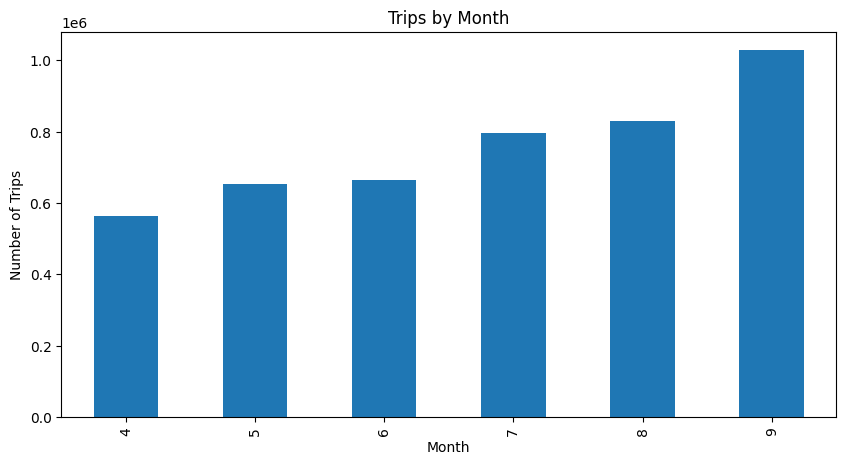

In [ ]:
import matplotlib.pyplot as plt
trips_by_month = uber_data_2014.groupby('Month')['Month'].count()
trips_by_month.plot(kind='bar', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month')
plt.show()


#### Which day experiences the highest level of activity?

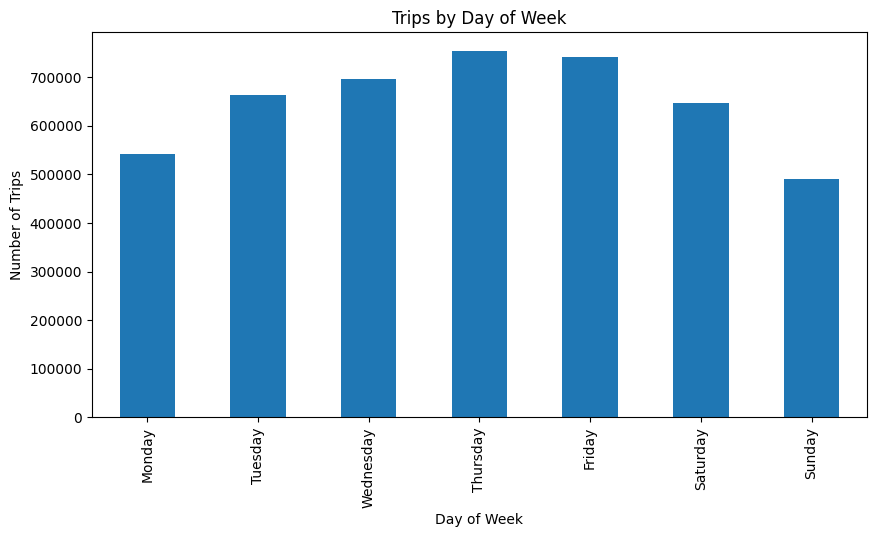

In [ ]:
import matplotlib.pyplot as plt
trips_by_weekday = uber_data_2014.groupby('DayOfWeek')['DayOfWeek'].count()
trips_by_weekday = trips_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
trips_by_weekday.plot(kind='bar', figsize=(10,5))
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week')
plt.show()


#### Distribution of trips by hours and weekly

<ipython-input-8-e98d181ccbdd>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('RdPu', len(trips_by_hour_week))


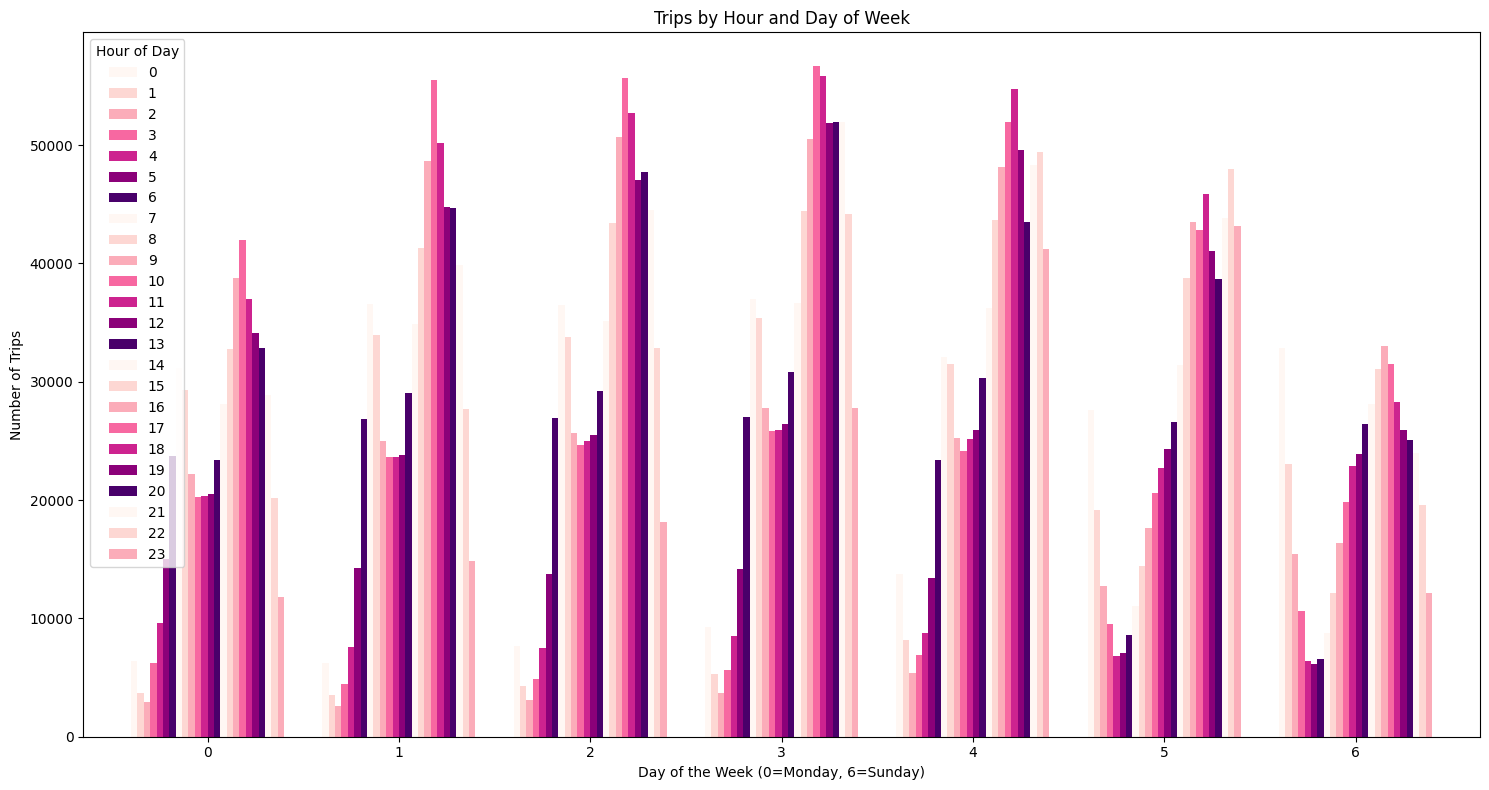

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming uber_data_2014 DataFrame is already loaded as in the provided code

# Group data by hour and day of the week, then count trips
trips_by_hour_week = uber_data_2014.groupby(['DayOfWeekNum', 'HourOfDay'])['HourOfDay'].count().unstack()

# Create a colormap
viridis = cm.get_cmap('RdPu', len(trips_by_hour_week))

# Get colors from the colormap
# We use np.linspace to create evenly spaced values between 0 and 1
# and then pass them to the colormap to get the corresponding colors
colors = viridis(np.linspace(0, 1, len(trips_by_hour_week)))


# Plotting
# Instead of viridis.colors, use the colors array we created
ax = trips_by_hour_week.plot(kind='bar', figsize=(15, 8), width=0.8, color=colors)

# Customize the plot
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Day of Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Hour of Day')

# Improve colorbar visibility
plt.tight_layout()
plt.show()

#### Base having highest frequency

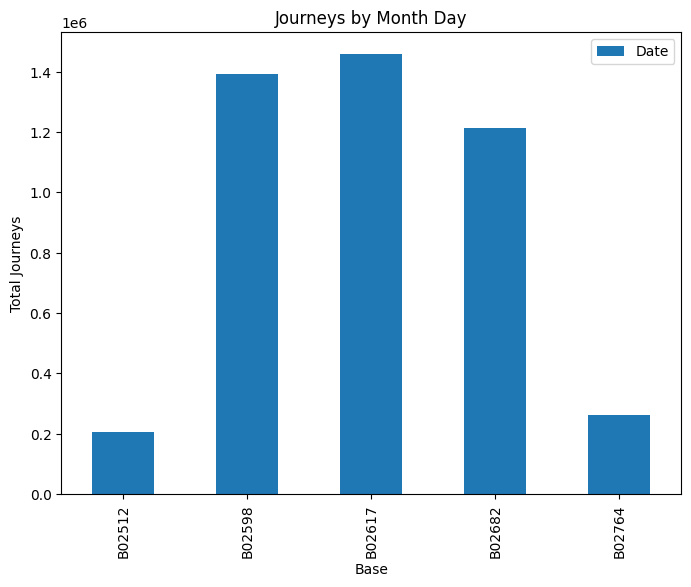

In [ ]:
uber_data_2014.groupby(pd.Grouper(key='Base')).count()

uber_monthdays = uber_data_2014.pivot_table(index=['Base'], values='Date' ,
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

Here we can see that Base B02617 provided most cabs. Closely followed by B02598

### Splitting the dataset

As we have a very large dataset of 4.5 million+ values. I have used 90-10 split

In [ ]:
uber_data_2014= uber_data_2014.drop(columns = ['Month','DayOfWeekNum','Base', 'DayOfWeek', 'MonthDayNum', 'HourOfDay'])
#uber_data_2014.tail()

In [ ]:
'''
The df uber_count is the grouping of the above dataset on hourly basis with time stamp of both date and time.
This df is used mostly for ANN analysis.
'''
uber_count=uber_data_2014.groupby(pd.Grouper(key='Date')).count()
uber_count= uber_count.drop(columns = ['Date_only'])
print(uber_count.info())

train = uber_count[:][:234083]             #90% of 260093
test = uber_count[:][234084:]
display(train.tail())
test.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260093 entries, 2014-04-01 00:11:00 to 2014-09-30 03:26:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Date/Time  260093 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB
None


,Date/Time
Date,
2014-09-24 09:49:00,25
2014-09-24 09:50:00,16
2014-09-24 09:52:00,24
2014-09-24 09:56:00,15
2014-09-24 09:57:00,23


,Date/Time
Date,
2014-09-24 09:59:00,19
2014-09-24 10:00:00,15
2014-09-24 10:04:00,10
2014-09-24 10:05:00,17
2014-09-24 10:06:00,16


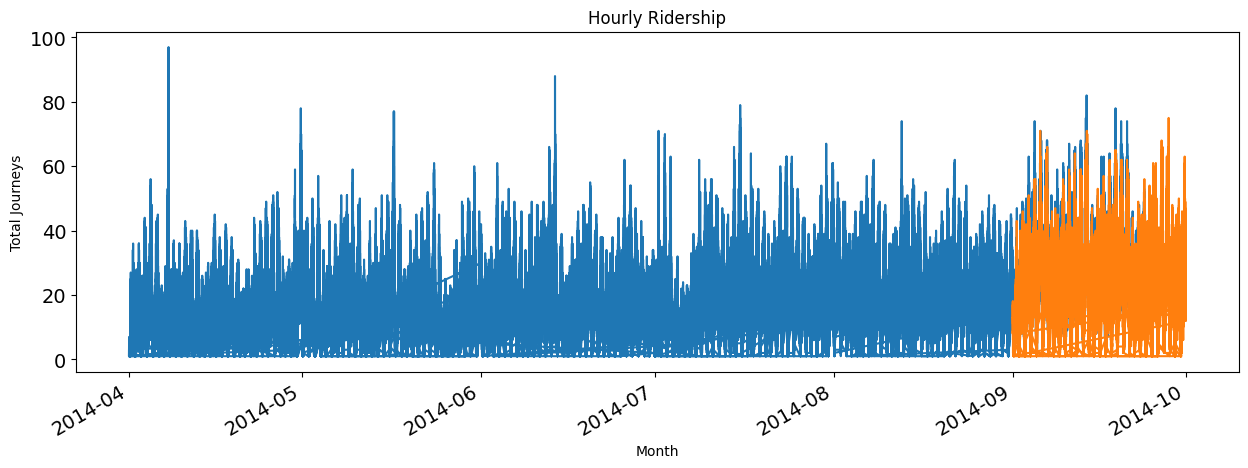

In [ ]:
train['Date/Time'].plot(kind='line',figsize=(15,8), title= 'Hourly Ridership', fontsize=14)
test['Date/Time'].plot(figsize=(15,5), title= 'Hourly Ridership', fontsize=14)
plt.ylabel('Total Journeys')
plt.xlabel('Month')
plt.show()

In [ ]:
'''
The df uber_dates is the grouping of the above dataset on daily basis with time stamp of onlu date.
This df is used to for univariate Time Series Forecasting.
'''
uber_dates=uber_data_2014.groupby(pd.Grouper(key='Date_only')).count()
uber_dates= uber_dates.drop(columns = ['Date'])
print(uber_dates.info())
uber_dates_d= uber_dates.drop(columns = ['Date/Time'])

train_ts = uber_dates[:][:163]                     #split is 90-10
test_ts = uber_dates[:][164:]
test_ts_d = uber_dates_d[:][164:]
test_ts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2014-04-01 to 2014-09-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date/Time  183 non-null    int64
dtypes: int64(1)
memory usage: 2.9+ KB
None


,Date/Time
Date_only,
2014-09-12,39540
2014-09-13,43205
2014-09-14,28122
2014-09-15,29454
2014-09-16,36092


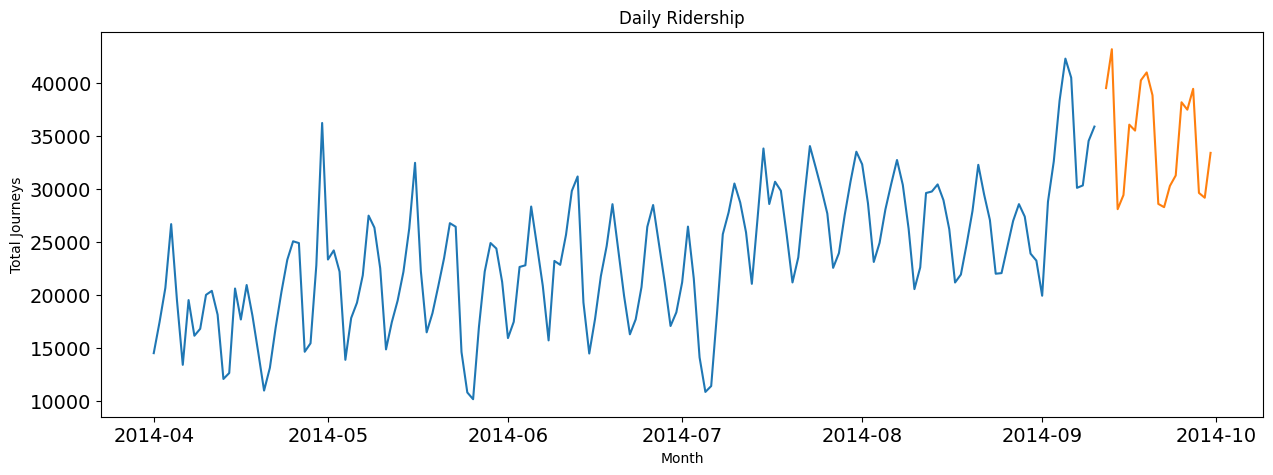

In [ ]:
train_ts['Date/Time'].plot(kind='line',figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test_ts['Date/Time'].plot(figsize=(15,5), title= 'Daily Ridership', fontsize=14)
plt.ylabel('Total Journeys')
plt.xlabel('Month')
plt.show()

## Time Series Forcasting

### Holt’s Winter seasonal method

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


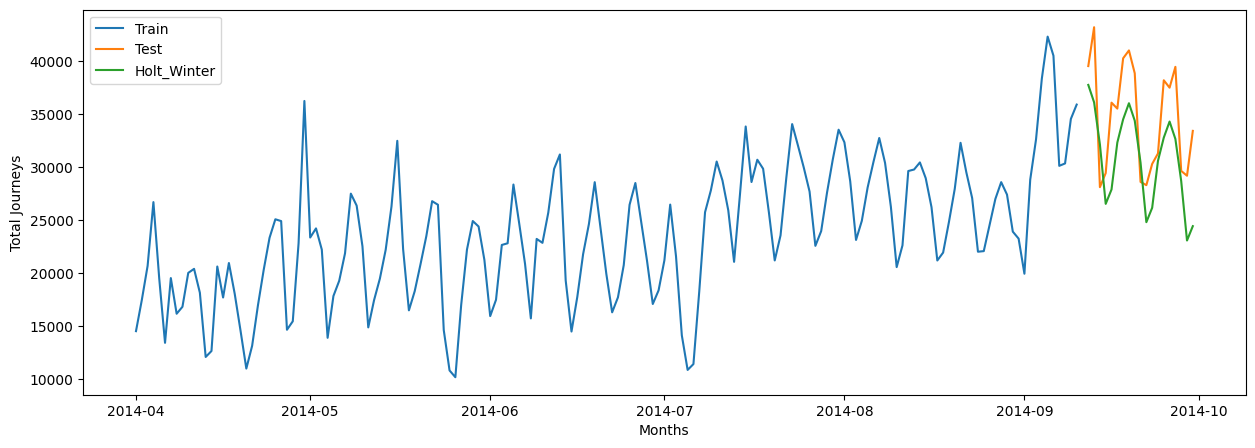

In [ ]:
y_hat_avg = test_ts.copy()
fit1 = ExponentialSmoothing(np.asarray(train_ts['Date/Time'].astype(float)) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_ts))
plt.figure(figsize=(15,5))
plt.plot( train_ts['Date/Time'], label='Train')
plt.plot(test_ts['Date/Time'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Total Journeys')
plt.xlabel('Months')
plt.show()

In [ ]:
holt_winter_rmse = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg['Holt_Winter']))
holt_winter_rmse

4978.634738209522

This model also gives comparitively the best accuracy compared to other Time Series Forecasting Methods. It has comparitively lower RMSE and we can see from the above plot that the predicted Holt winter graph is almost overlapping with the actual test dataset available to us

### SARIMA Model

### Holt’s Linear Trend method

<Figure size 1600x800 with 0 Axes>

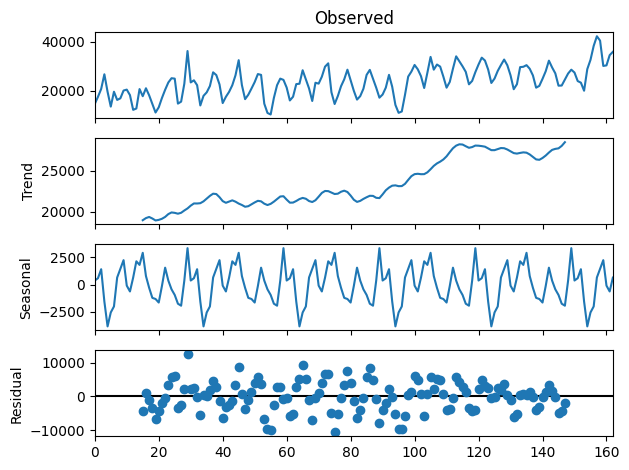

In [ ]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
# Replacing 'freq' with 'period'
sm.tsa.seasonal_decompose(train_ts['Date/Time'].values,period=30).plot()
result = sm.tsa.stattools.adfuller(uber_dates['Date/Time'])
plt.show()

<ipython-input-18-c09107353436>:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train_ts['Date/Time']).astype(float)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


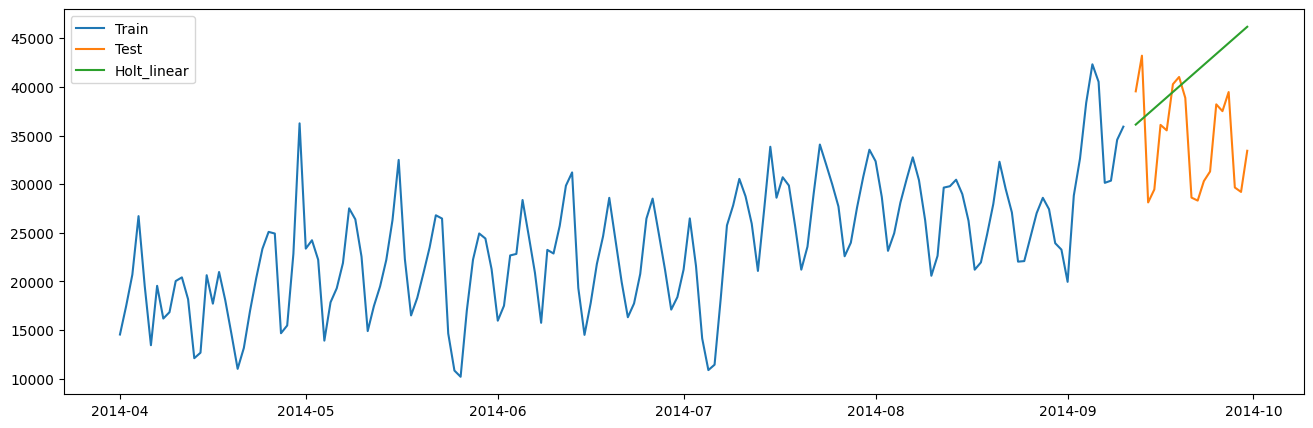

In [ ]:
y_hat_avg = test_ts.copy()

fit1 = Holt(np.asarray(train_ts['Date/Time']).astype(float)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test_ts))

plt.figure(figsize=(16,5))
plt.plot(train_ts['Date/Time'], label='Train')
plt.plot(test_ts['Date/Time'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
holt_linear_rms = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg.Holt_linear))
print(holt_linear_rms)

9185.893757827105


Here we can see that Holt Linear Trend is hardly a good model for our dataset.

### Simple Exponential Smoothing

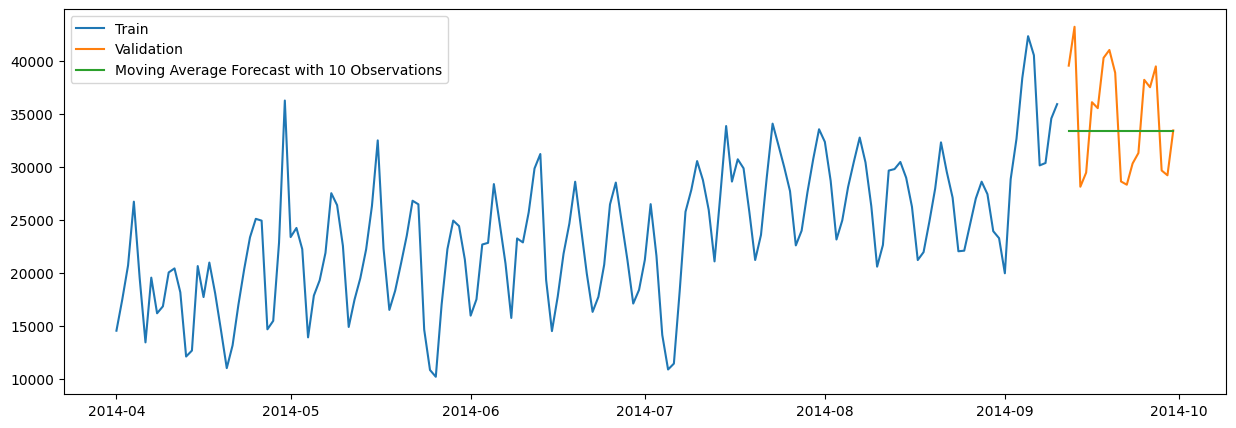

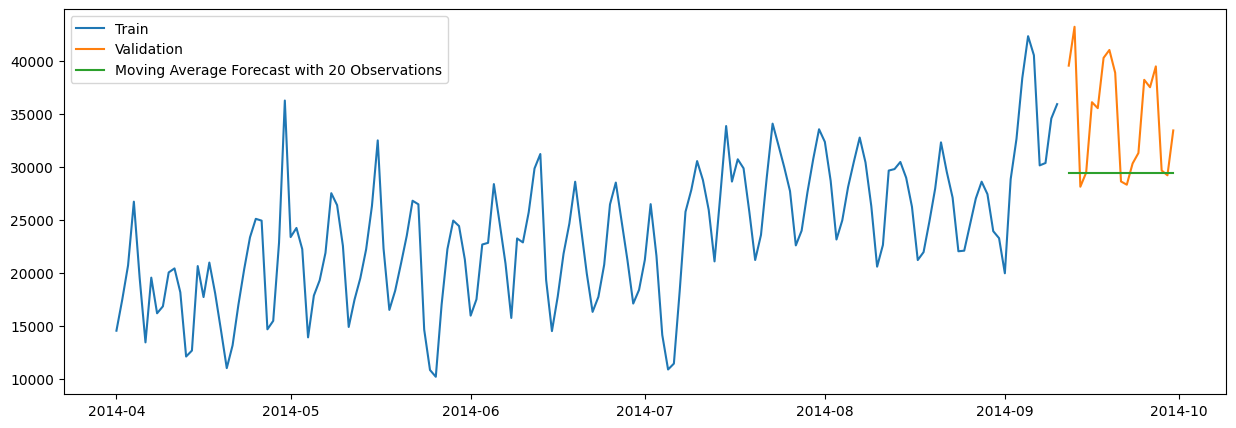

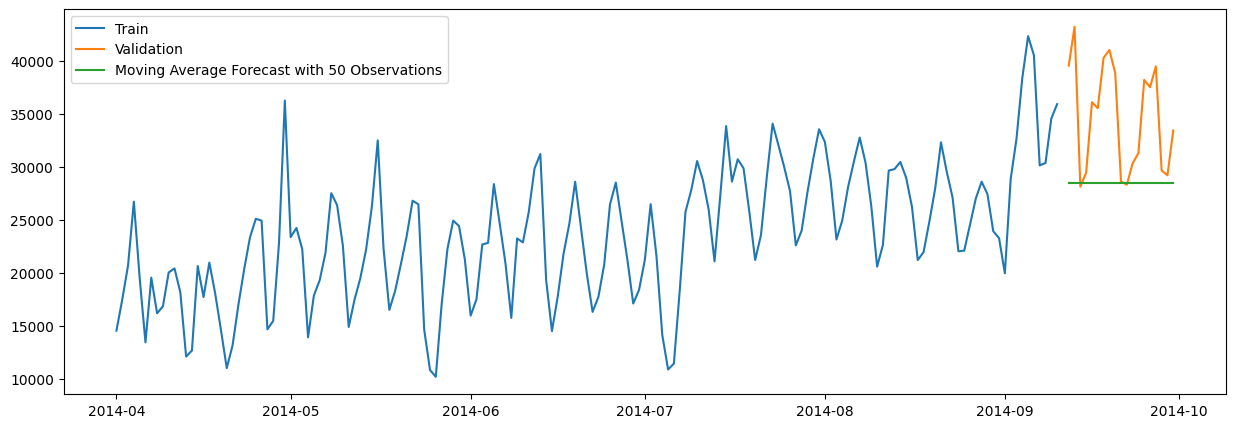

In [ ]:
y_hat_avg = test_ts.copy()
y_hat_avg['moving_average_forecast'] = train_ts['Date/Time'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = test_ts.copy()
y_hat_avg['moving_average_forecast'] = train_ts['Date/Time'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = test_ts.copy()
y_hat_avg['moving_average_forecast']= train_ts['Date/Time'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

#### RMSE Error for Simple Exponential Smoothing

In [ ]:
simple_exp_rmse = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg['moving_average_forecast']))
simple_exp_rmse

7885.059783928484

#### Simple Exponential Smoothing is not the right model for our dataset

### SARIMA Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


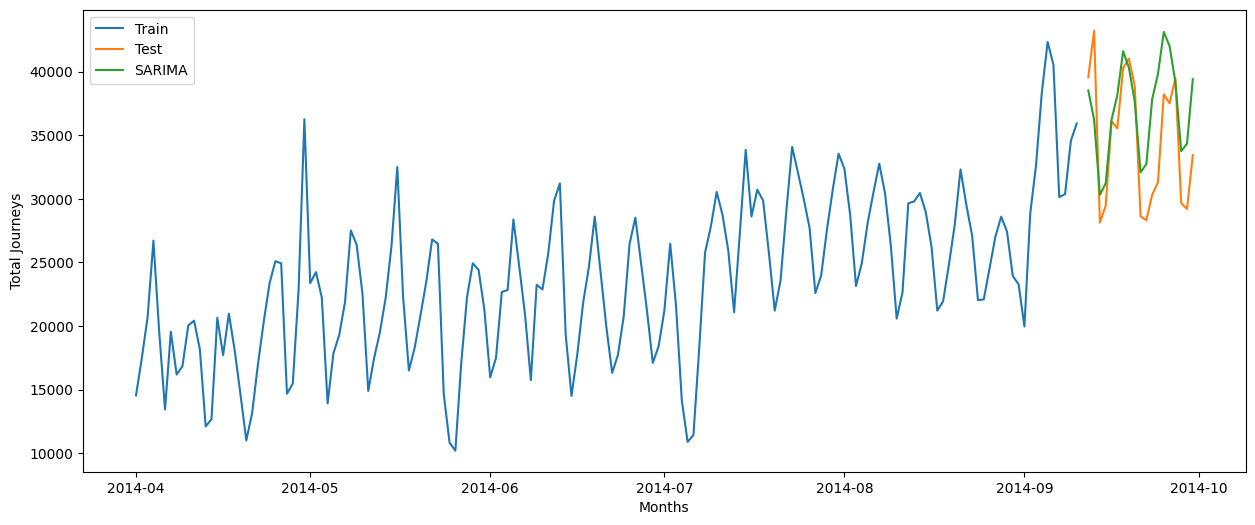

In [ ]:
y_hat_avg = test_ts.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_ts['Date/Time'], order=(2, 1, 4),seasonal_order=(1,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-09-11", end="2014-09-30", dynamic=True)
plt.figure(figsize=(15,6))
plt.plot( train_ts['Date/Time'], label='Train')
plt.plot(test_ts['Date/Time'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.ylabel('Total Journeys')
plt.xlabel('Months')
plt.show()

In [ ]:
sarima_rms = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg.SARIMA))
print(sarima_rms)

4302.071047842594


#### SARIMA Model also predicts with comparable accuracy as the above holt winter season method as we can see here as well that the predicted sarima graph is almost overlapping with the actual test dataset available to us

### ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    #rolmean = pd.rolling_mean(timeseries,window = 24)
    #rolstd = pd.rolling_std(timeseries, window = 24)

    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()


    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)

    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

###### ADF test

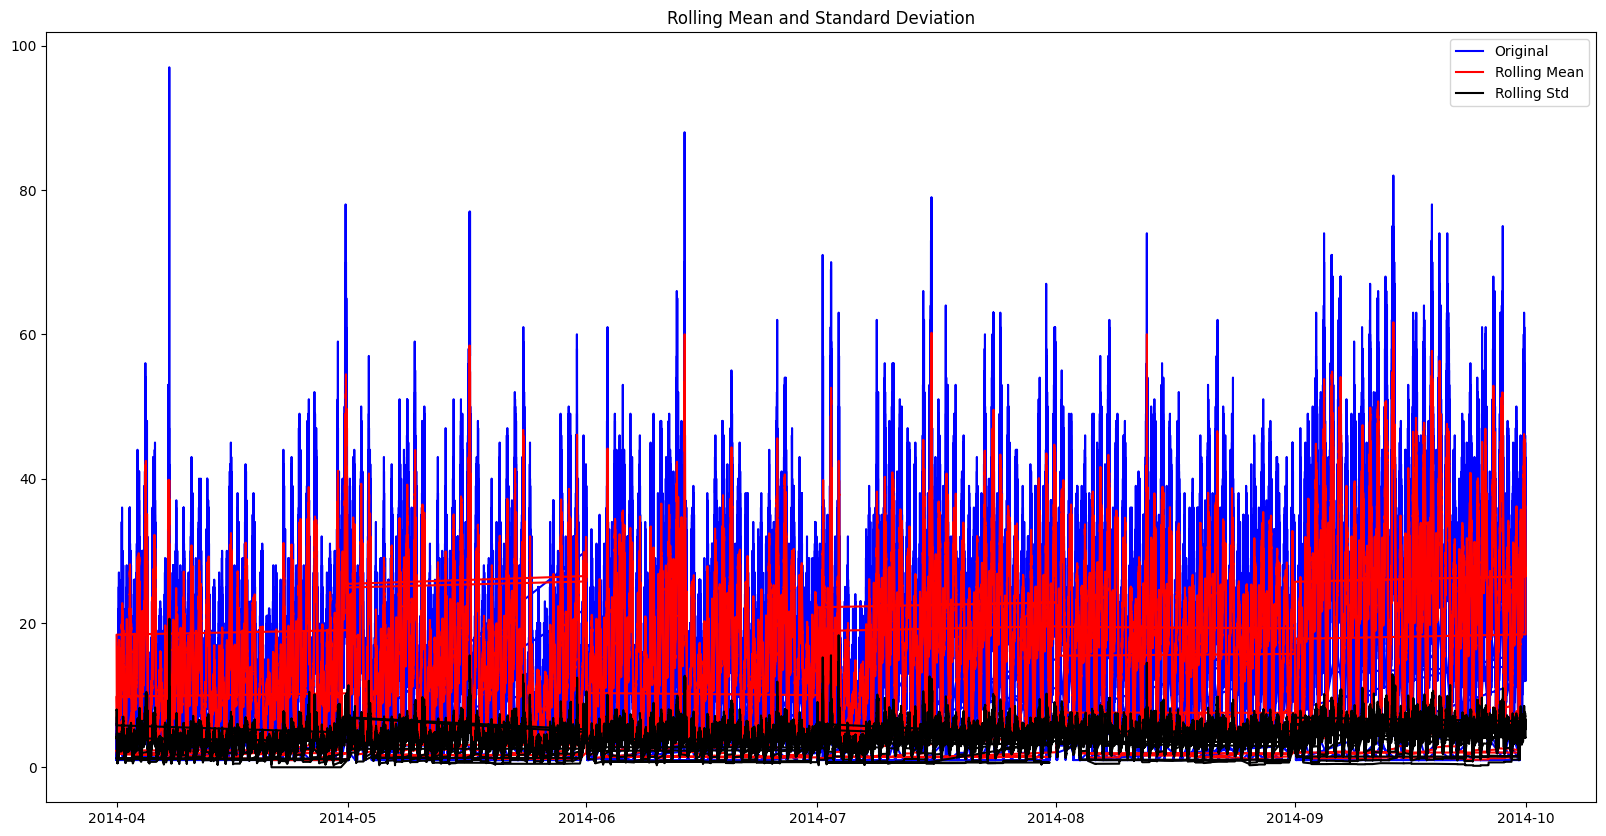

Results of Dickey Fuller test: 
Test Statistics                   -26.382495
p-value                             0.000000
# Lag Used                         85.000000
Number of Observations Used    260007.000000
Critical Value (1%)                -3.430375
Critical Value (5%)                -2.861551
Critical Value (10%)               -2.566776
dtype: float64


In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(uber_count['Date/Time'])

#### Remove Trend

In [ ]:
Train_log = np.log(train_ts['Date/Time'])
valid_log = np.log(test_ts['Date/Time'])

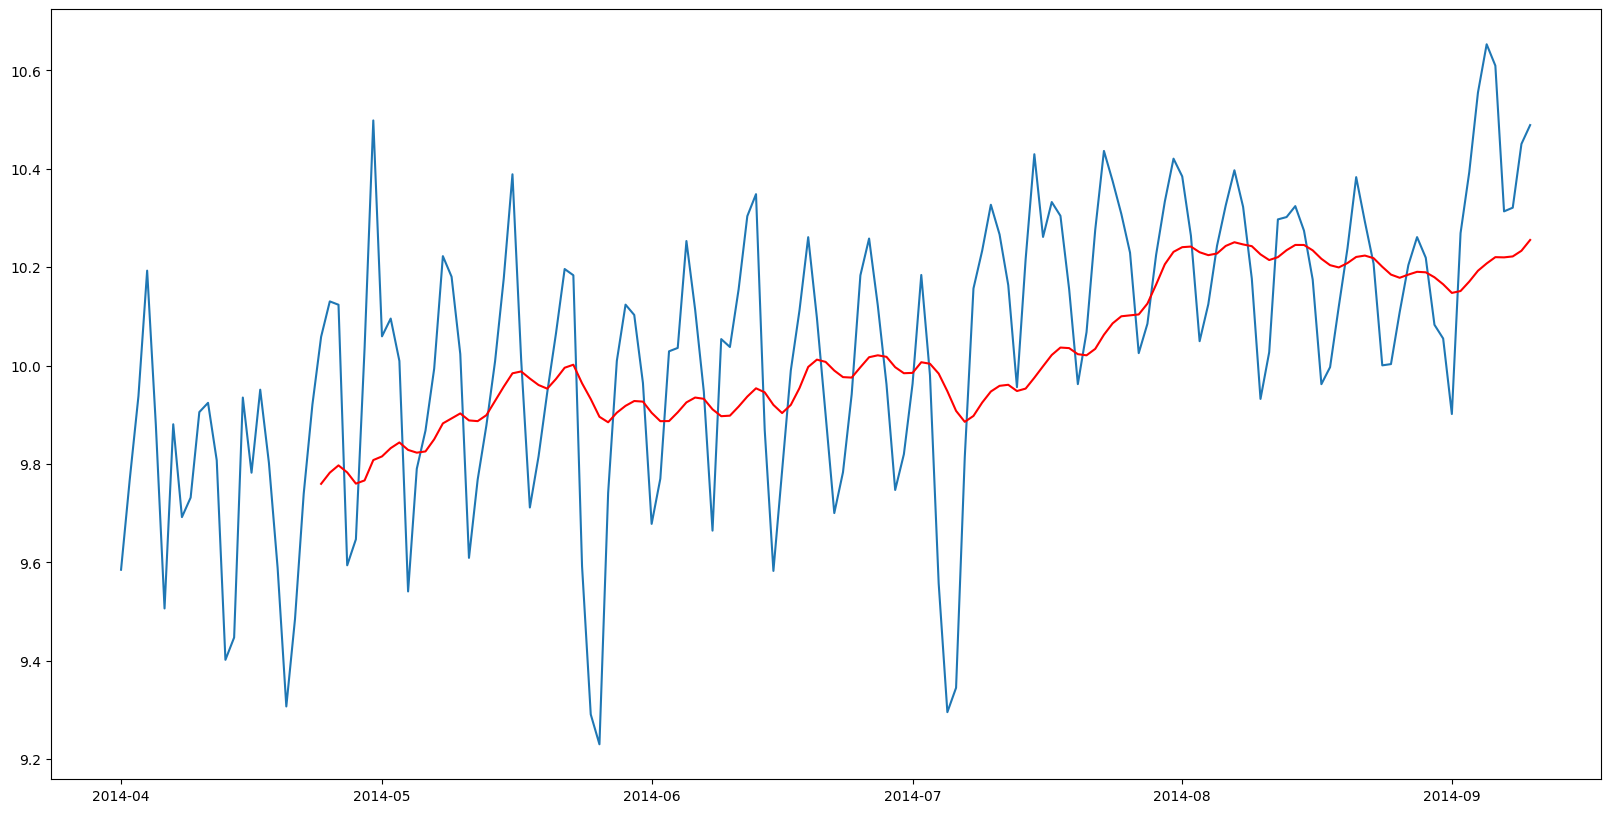

In [ ]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

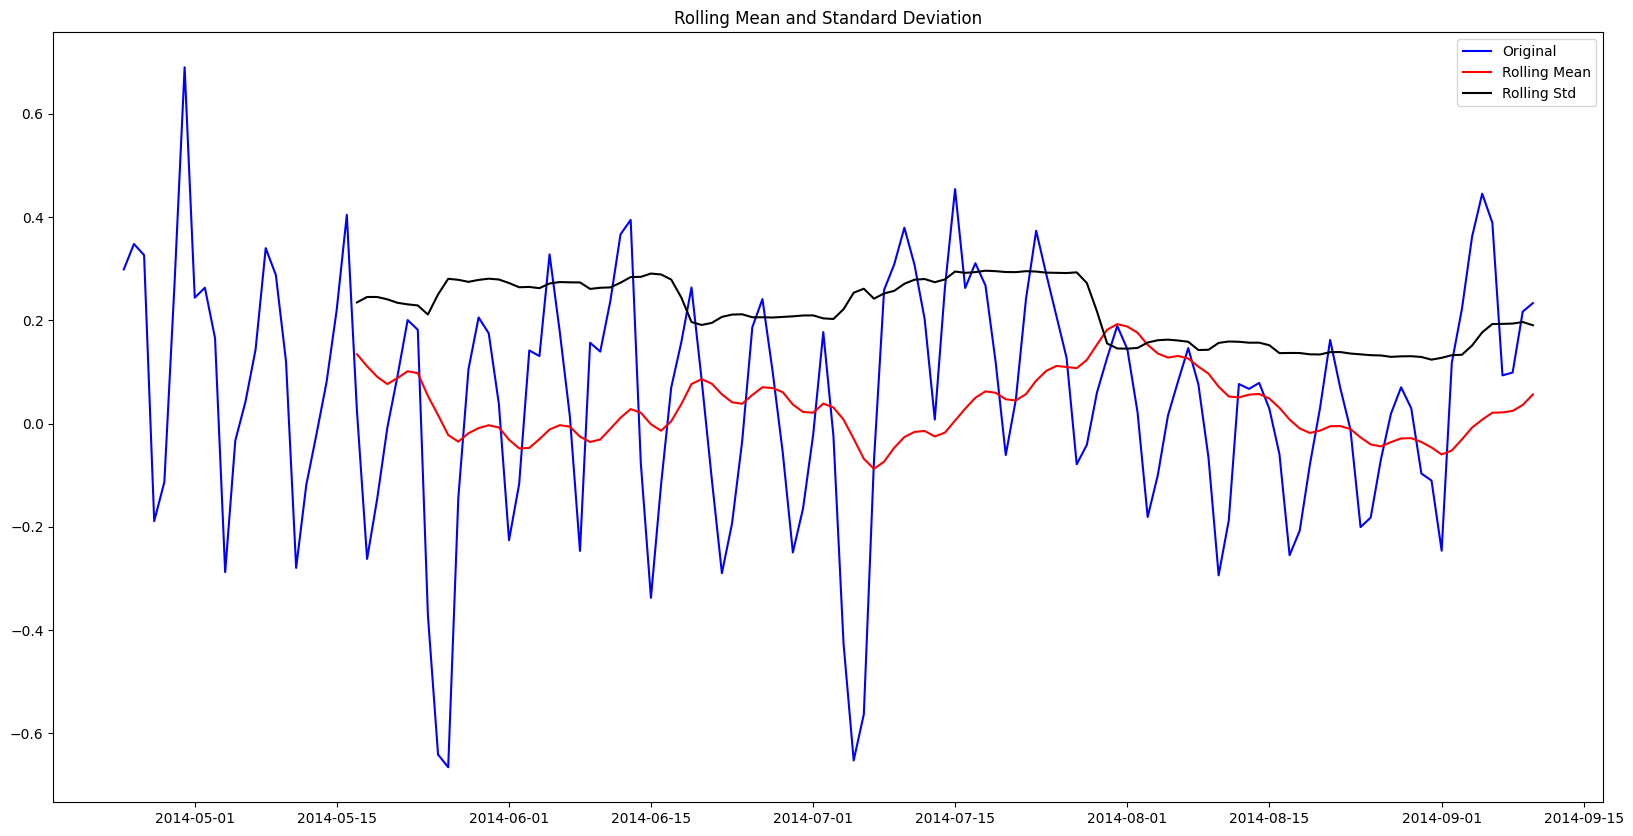

Results of Dickey Fuller test: 
Test Statistics                 -3.511603
p-value                          0.007694
# Lag Used                       7.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


In [ ]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

#### Differncing can help to make series stable and eliminate trend

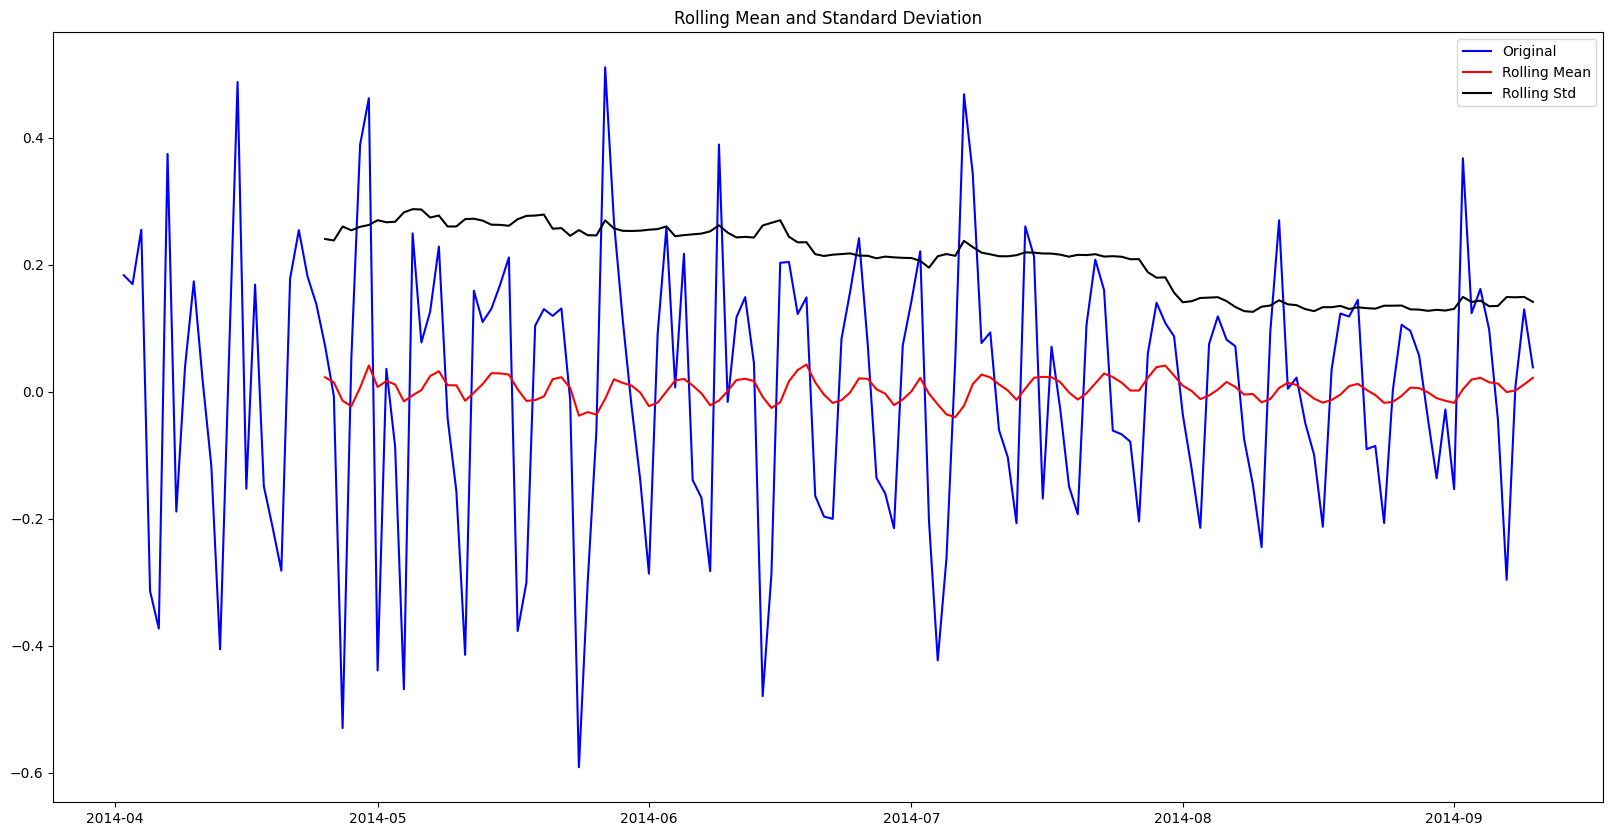

Results of Dickey Fuller test: 
Test Statistics               -6.285840e+00
p-value                        3.700033e-08
# Lag Used                     1.100000e+01
Number of Observations Used    1.500000e+02
Critical Value (1%)           -3.474715e+00
Critical Value (5%)           -2.881009e+00
Critical Value (10%)          -2.577151e+00
dtype: float64


In [ ]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

#### Removing Seasonailty

In [ ]:
## Removing Seasonality

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Replacing 'freq' with 'period'
decomposition = seasonal_decompose(pd.DataFrame(Train_log)['Date/Time'].values, period=24)

#### Checking stationarity of residuals

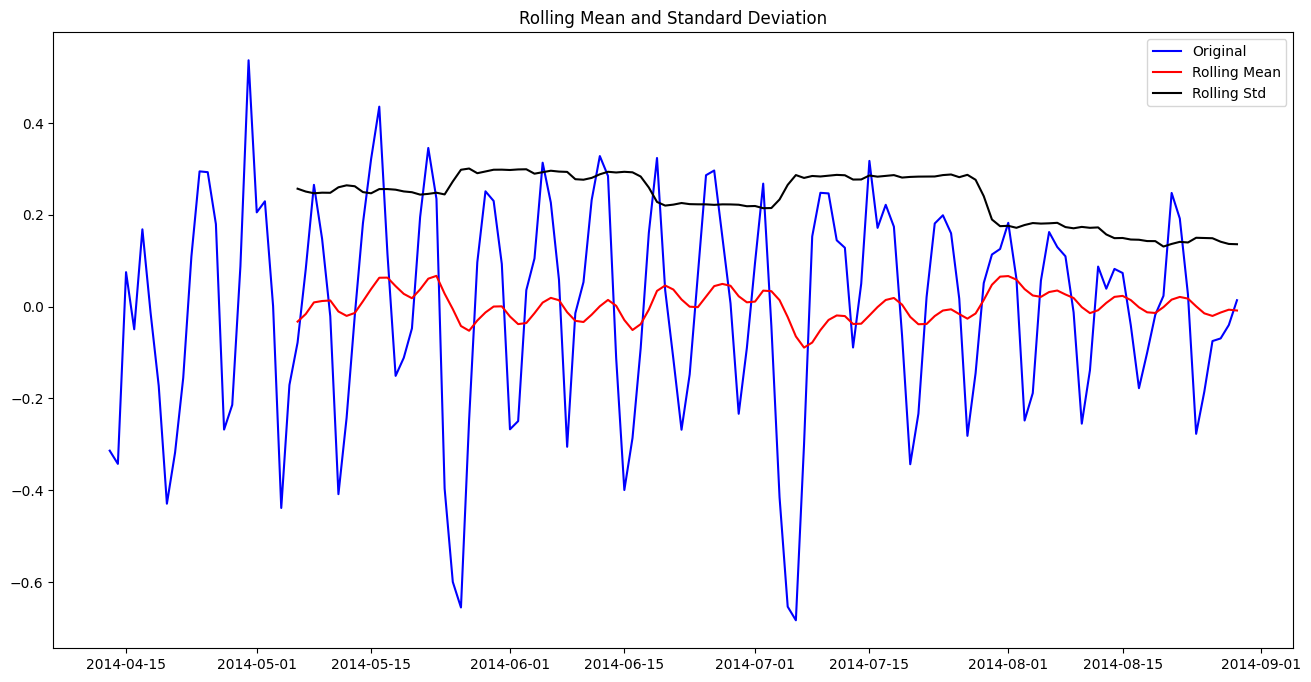

Results of Dickey Fuller test: 
Test Statistics               -6.254903e+00
p-value                        4.362933e-08
# Lag Used                     9.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (1%)           -3.482088e+00
Critical Value (5%)           -2.884219e+00
Critical Value (10%)          -2.578864e+00
dtype: float64


In [ ]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

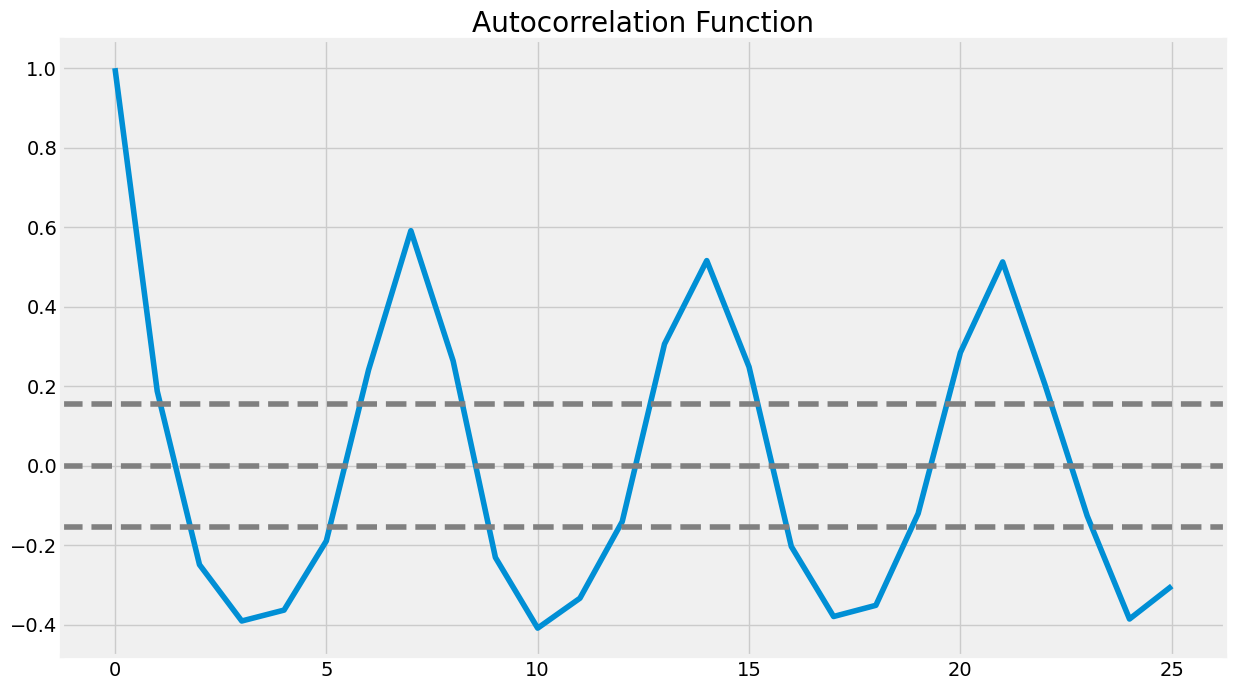

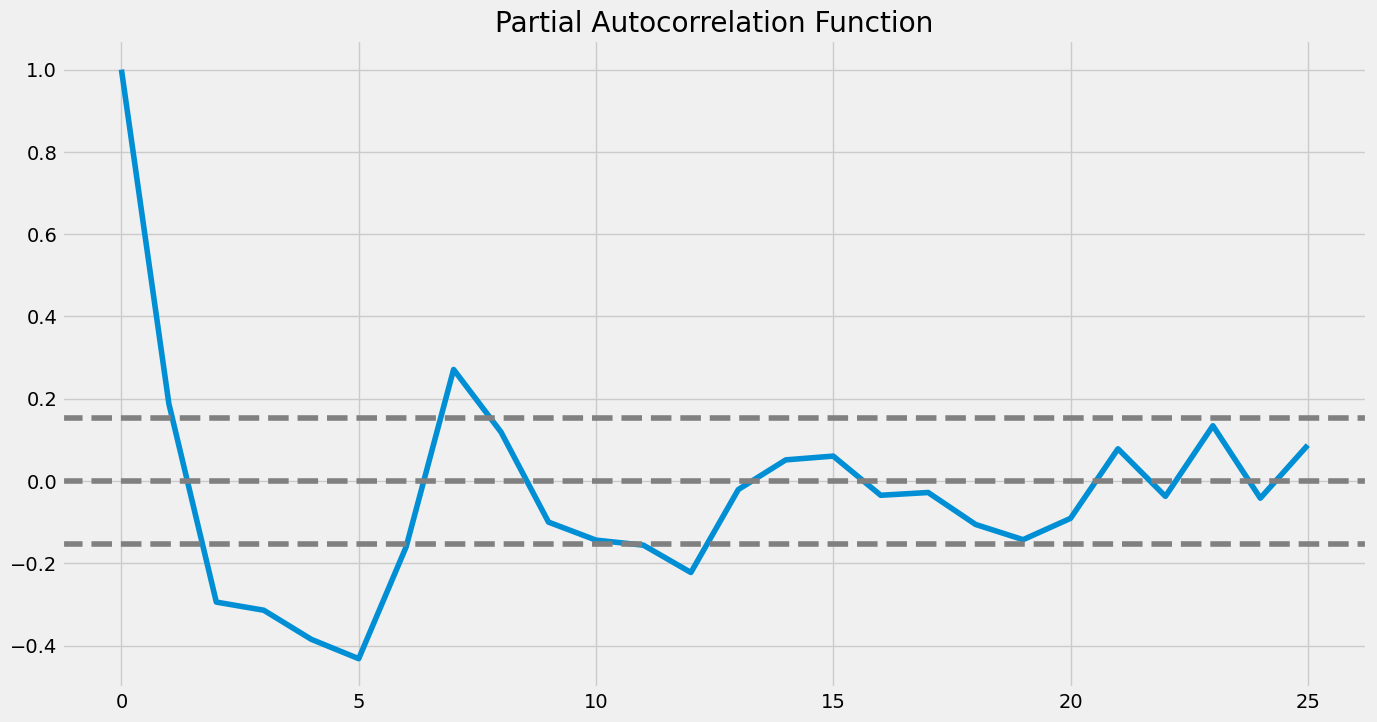

In [ ]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

### AR model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

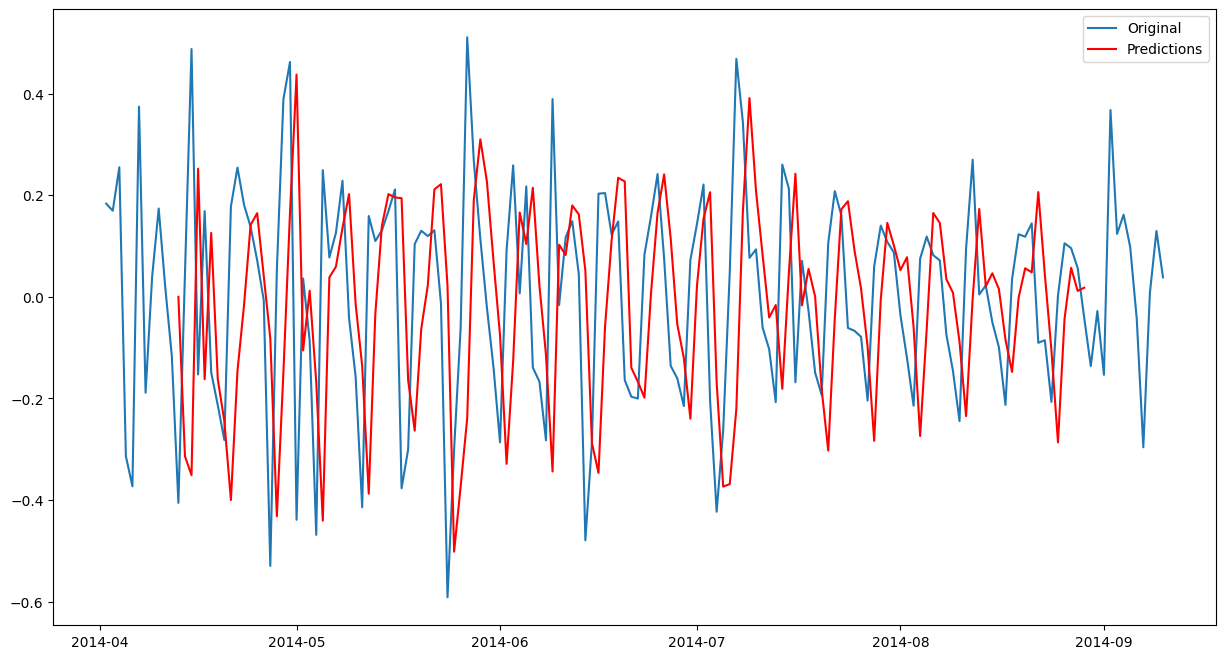

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Updated import for the new ARIMA implementation

# Fitting the ARIMA model with AR(2), I(1), MA(2)
plt.figure(figsize=(15, 8))

# Setting a simple white background
plt.style.use('default')

# ARIMA model with p=2, d=1, q=0 (AR Model)
model = ARIMA(train_log_decompose, order=(2, 1, 2))
results_AR = model.fit()  # 'disp' is no longer supported in the newer version of statsmodels

# Plotting the original differenced series
plt.plot(train_log_diff.dropna(), label="Original")

# Plotting the fitted values (predictions)
plt.plot(results_AR.fittedvalues, color='red', label='Predictions')

# Adding legend
plt.legend(loc='best')

# Disable the grid
plt.grid(False)

# Display the plot
plt.show()


In [ ]:
# Moving Average Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


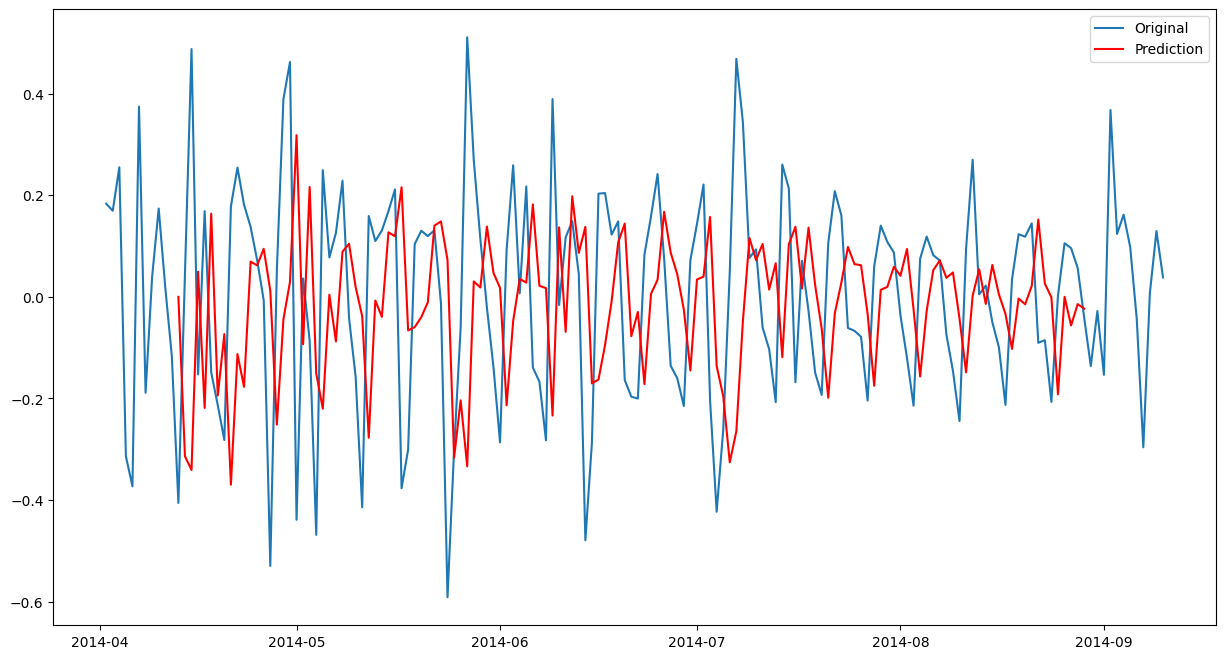

In [ ]:
plt.figure(figsize = (15,8))
model = ARIMA(train_log_decompose, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit()
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
# Disable the grid
plt.grid(False)
plt.legend(loc = "best")

In [ ]:
# Combined Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

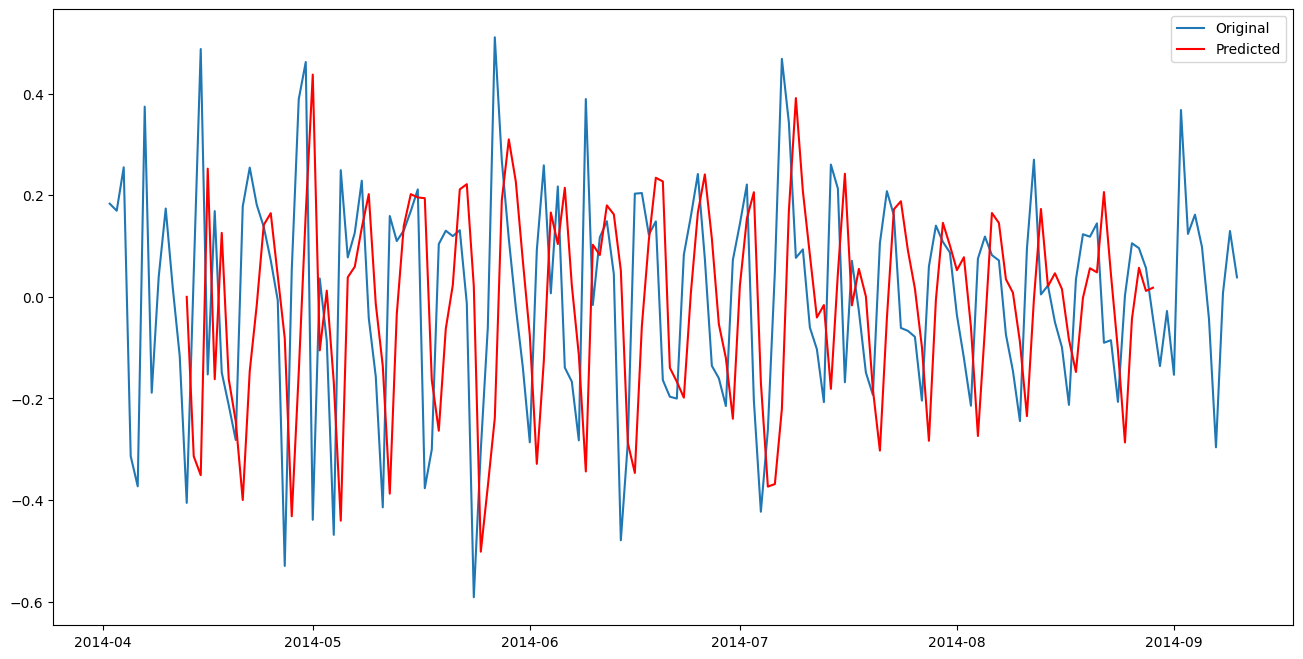

In [ ]:
plt.figure(figsize = (16,8))
model = ARIMA(train_log_decompose, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
# Function to scale model to original scale

<ipython-input-60-4aaf3a886cf4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Date/Time'])[0], index = given_set.index)


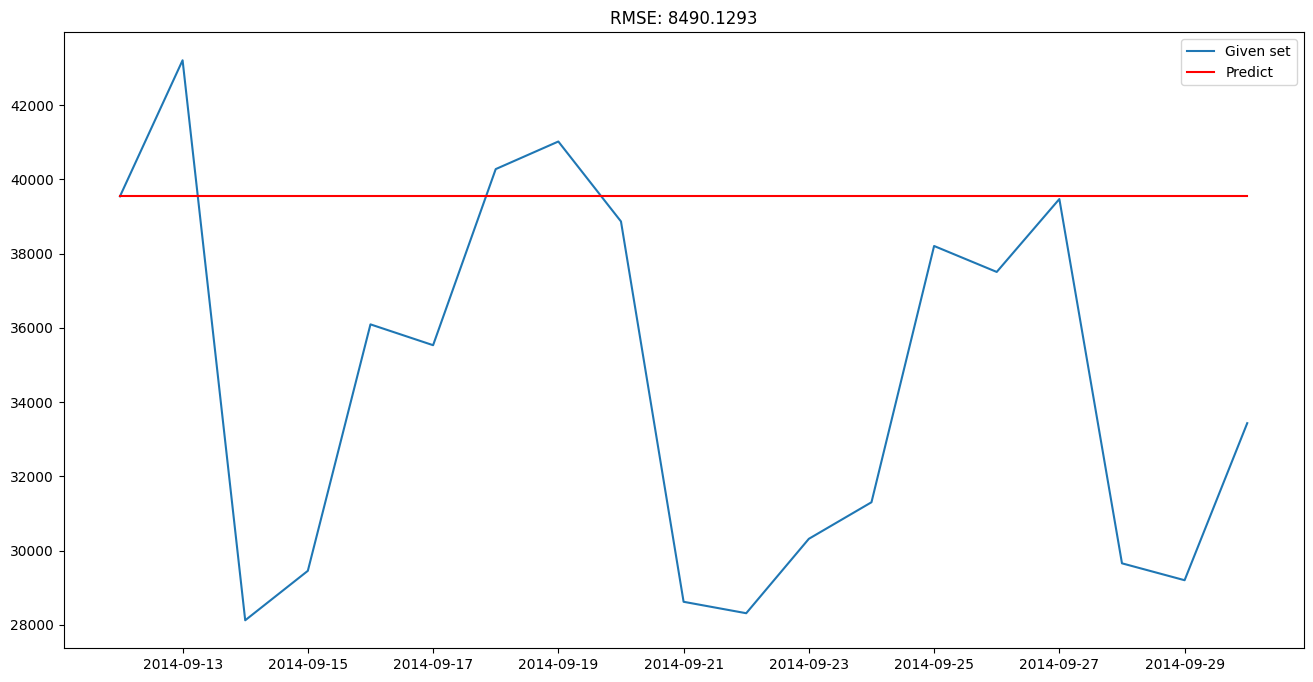

In [ ]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Date/Time'])[0], index = given_set.index)
    #predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_base)

    plt.plot(given_set['Date/Time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Date/Time']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)

    plt.plot(given_set['Date/Time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Date/Time']))/given_set.shape[0]))
    plt.show()


ARIMA_predict_diff=results_ARIMA.predict(start="2014-09-11", end="2014-09-30")

plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, test_ts)

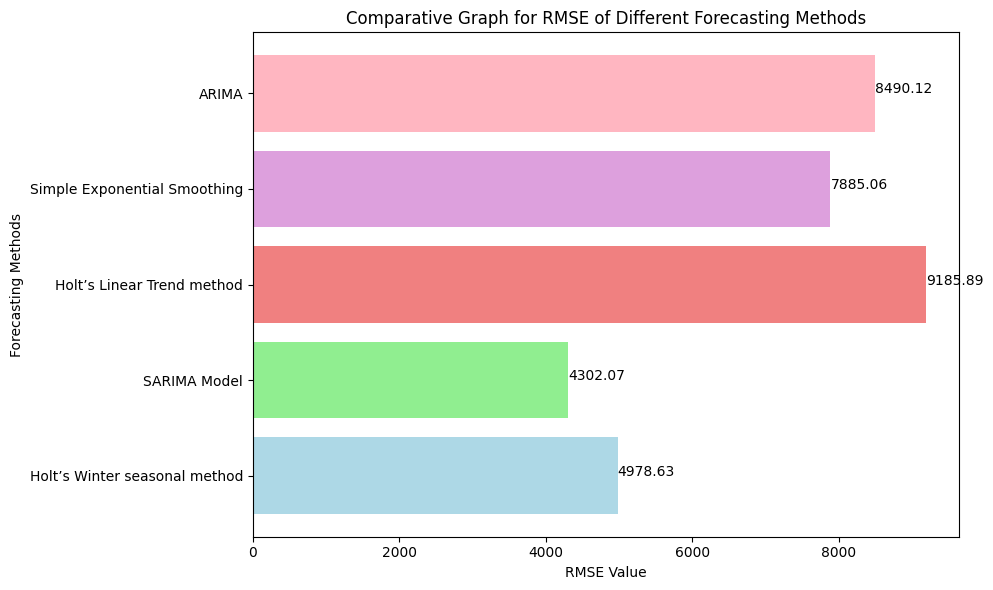

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding RMSE values
models = [
    "Holt’s Winter seasonal method",
    "SARIMA Model",
    "Holt’s Linear Trend method",
    "Simple Exponential Smoothing",
    "ARIMA"
]

rmse_values = [
    4978.63,  # Holt's Winter seasonal method
    4302.07,  # SARIMA Model
    9185.89,  # Holt's Linear Trend method
    7885.06,  # Simple Exponential Smoothing
    8490.12   # ARIMA
]

# Plotting the RMSE values as a bar chart
plt.figure(figsize=(10,6))
# Using light color shades
plt.barh(models, rmse_values, color=['lightblue', 'lightgreen', 'lightcoral', '#DDA0DD', 'lightpink'])

# Adding titles and labels
plt.xlabel('RMSE Value')
plt.ylabel('Forecasting Methods')
plt.title('Comparative Graph for RMSE of Different Forecasting Methods')

# Display the RMSE values on the bars
for index, value in enumerate(rmse_values):
    plt.text(value, index, f'{value:.2f}', color='black')

# Remove grid lines and set white background
plt.grid(False)
plt.gca().set_facecolor('white')  # Set white background

# Show the plot
plt.tight_layout()
plt.show()


## Result

#### From the above analysis we can see that Holt's Winter Season and SARIMA  with small RMSE values gave the best result for our dataset with least RMSE value compared to other models used.